# PriceTrack: Unlocking Bike Market Insights

PriceTrack is a data science project designed to predict the valuation of used bike based on key input parameters.
Leveraging Multiple Linear regression model, it provides data-driven insights to help sellers make informed decisions.

## Exploratory Data Analysis (EDA)

This step helps us understand the data we are dealing with and it's various aspects.

We will be performing univariate and bivariate analysis along with plotting some graphs for better understanding.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("Data.csv")
df

,model,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000,Ahmedabad,17654,First Owner,3,110,TVS
1,Royal Enfield Classic 350cc,119900,Delhi,11000,First Owner,4,350,Royal Enfield
2,Triumph Daytona 675R,600000,Delhi,110,First Owner,8,675,Triumph
3,TVS Apache RTR 180cc,65000,Bangalore,16329,First Owner,4,180,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,Bangalore,10000,First Owner,3,150,Yamaha
...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000,Delhi,22000,First Owner,4,100,Hero
32644,TVS Apache RTR 180cc,30000,Karnal,6639,First Owner,9,180,TVS
32645,Bajaj Avenger Street 220,60000,Delhi,20373,First Owner,6,220,Bajaj
32646,Hero Super Splendor 125cc,15600,Jaipur,84186,First Owner,16,125,Hero


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model       32648 non-null  object
 1   price       32648 non-null  int64 
 2   city        32648 non-null  object
 3   kms_driven  32648 non-null  int64 
 4   owner       32648 non-null  object
 5   age         32648 non-null  int64 
 6   power       32648 non-null  int64 
 7   brand       32648 non-null  object
dtypes: int64(4), object(4)
memory usage: 2.0+ MB


In [4]:
df.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


### 📊 Data Types and Measurement Categories  

| Column Name   | Category   | Description |
|---------------|------------|-------------|
| `model`       | **Nominal**  | Specific bike model names, acting as unique identifiers without any order. |
| `price`       | **Ratio**    | Selling price of the bike; a continuous numeric variable with a meaningful zero. |
| `city`        | **Nominal**  | City of listing; categorical with no inherent ranking. |
| `kms_driven`  | **Ratio**    | Total kilometers the bike has been driven; continuous and has a true zero. |
| `owner`       | **Ordinal**  | Ownership status (e.g., First, Second); categorical with an implied order. |
| `age`         | **Ratio**    | Age of the bike in years; numeric with a true zero. |
| `power`       | **Ratio**    | Engine capacity in cc; continuous with a meaningful zero point. |
| `brand`       | **Nominal**  | Bike brand name; categorical without inherent order. |

## 1) Age Distribution

Mean: 8.048211222739525
Standard Deviation: 4.031700112790309
1st Percentile: 2.0
99th Percentile: 19.0


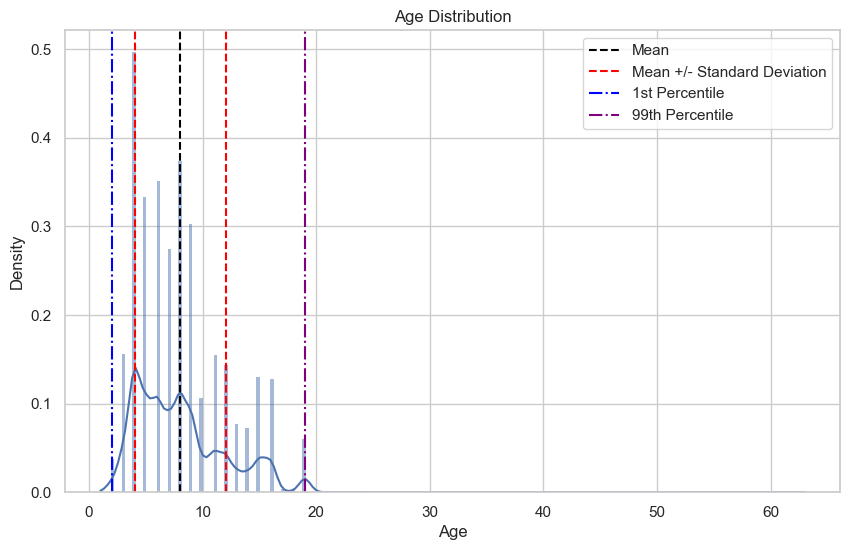

In [5]:
def showDistribution(df, column, title=None):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, stat="density", linewidth=0)
    
    mean_value = df[column].mean()
    std_value = df[column].std()
    percentile_1 = np.percentile(df[column], 1)
    percentile_99 = np.percentile(df[column], 99)
    print(f"Mean: {mean_value}\nStandard Deviation: {std_value}\n1st Percentile: {percentile_1}\n99th Percentile: {percentile_99}")
    
    plt.axvline(mean_value, color='black', linestyle='--', label="Mean")
    plt.axvline(mean_value + std_value, color='red', linestyle='--', label="Mean +/- Standard Deviation")
    plt.axvline(mean_value - std_value, color='red', linestyle='--')
    plt.axvline(percentile_1, color='blue', linestyle='-.', label='1st Percentile')
    plt.axvline(percentile_99, color='purple', linestyle='-.', label='99th Percentile')
    
    plt.title(title if title else f'{column} Distribution')
    plt.xlabel(column.capitalize())
    plt.ylabel('Density')
    plt.legend()
    plt.show()

showDistribution(df, "age", "Age Distribution")


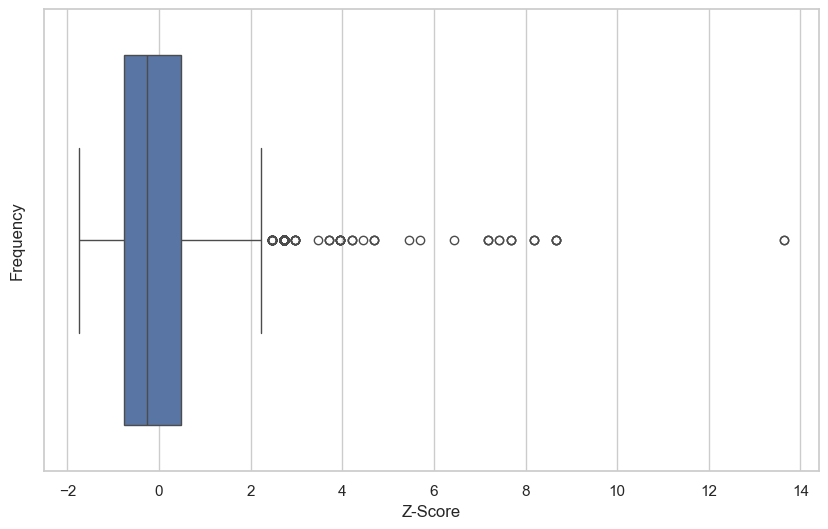

In [6]:
def showZScoreBoxPlot(df, column, title=None):
    if title is None:
        f'Boxplot of Z-Score of {column}'
    plt.figure(figsize=(10, 6))
    # Box plot of z-score of column
    z_score = (df[column] - df[column].mean()) / df[column].std()
    sns.boxplot(x=z_score)
    plt.title(title)
    plt.xlabel('Z-Score')
    plt.ylabel('Frequency')
    plt.show()

showZScoreBoxPlot(df, "age")


Removing the outliers whose z_score for `age` is beyond acceptance criteria i.e -3 to 3

In [7]:
z_score_age = (df["age"] - df["age"].mean()) / df["age"].std()
age_based_outliers_mask = (z_score_age < -3) | (z_score_age > 3)
print(f"{df[age_based_outliers_mask].shape[0]} records to will be removed")
print("Records to be removed:")
df[age_based_outliers_mask]

39 records to will be removed
Records to be removed:


,model,price,city,kms_driven,owner,age,power,brand
334,Royal Enfield Bullet 350 cc,125000,Hyderabad,16500,First Owner,39,350,Royal Enfield
1219,Hero CD 100SS,25500,Kharar,10000,First Owner,30,100,Hero
1334,TVS Suzuki Shogun 110cc,100000,Bangalore,66000,First Owner,23,110,TVS
1363,TVS Suzuki Shogun 110cc,100000,Bangalore,66000,First Owner,23,110,TVS
1519,Rajdoot GTX 175cc,75000,Delhi,500,Second Owner,41,175,Rajdoot
1976,Royal Enfield Standard 350cc,250000,Chennai,1400,Second Owner,27,350,Royal Enfield
2146,Royal Enfield‎ Bullet 350cc,85990,Raipur,19000,Fourth Owner Or More,37,350,Royal Enfield
2265,Yamaha RX135 135cc 4-Speed,85000,Mumbai,300,Third Owner,24,135,Yamaha
2299,Hero CD 100SS,10000,Chennai,646000,First Owner,24,100,Hero
2322,Hero CD 100SS,10000,Chennai,646000,First Owner,24,100,Hero


In [8]:
df_without_age_outliers = df[~age_based_outliers_mask]
print("New shape after removing age outliers: ", df_without_age_outliers.shape)

New shape after removing age outliers:  (32609, 8)


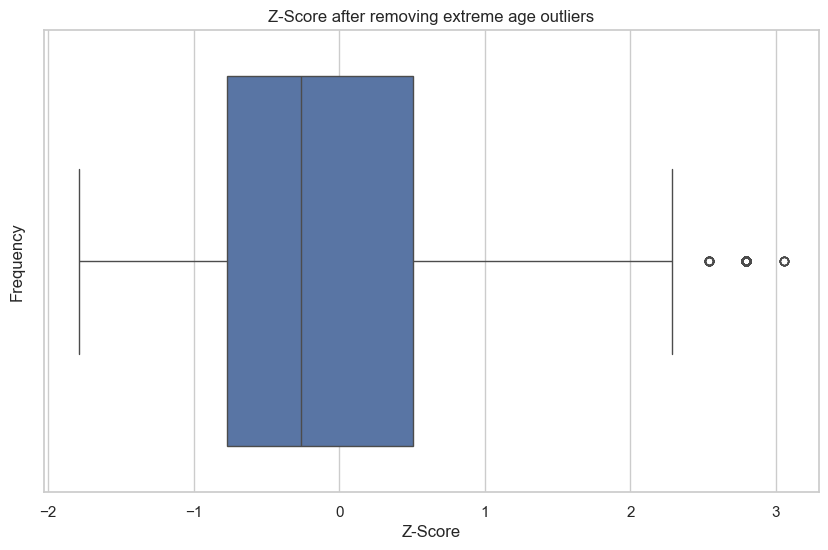

In [9]:
showZScoreBoxPlot(df_without_age_outliers, "age", title="Z-Score after removing extreme age outliers")

## 2) Mileage Distribution

Mean: 26291.831028243738
Standard Deviation: 21658.27570682319
1st Percentile: 140.0
99th Percentile: 84186.0


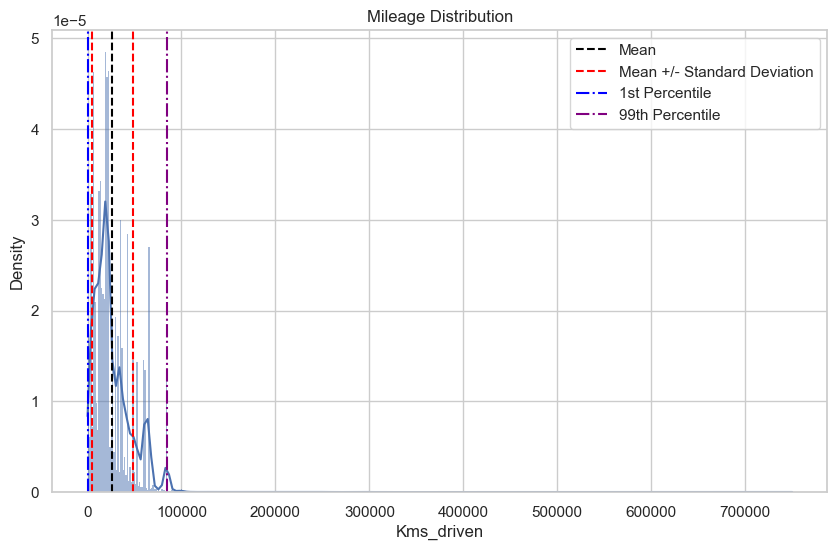

In [10]:
showDistribution(df_without_age_outliers, "kms_driven", title="Mileage Distribution")

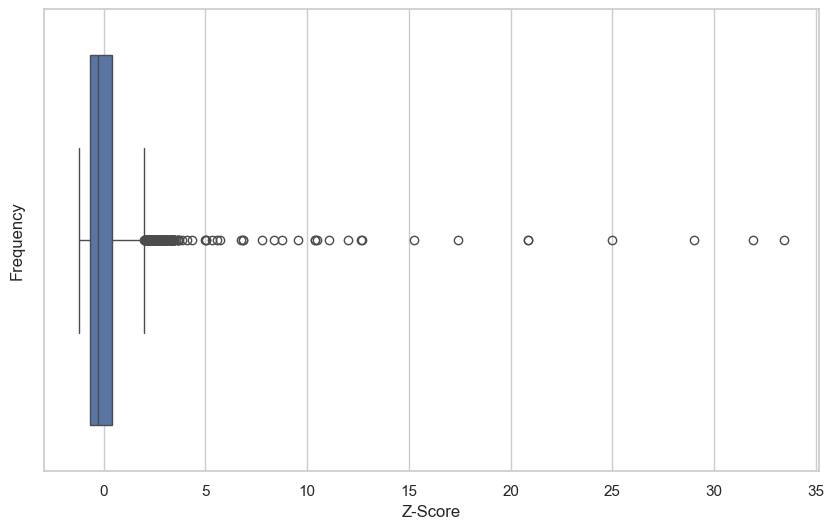

In [11]:
showZScoreBoxPlot(df_without_age_outliers, "kms_driven")

In [12]:
z_score_mileage = (df_without_age_outliers["kms_driven"] - df_without_age_outliers["kms_driven"].mean()) / df_without_age_outliers["kms_driven"].std()
mileage_based_outliers_mask = (z_score_mileage < -3) | (z_score_mileage > 3)
print(f"{df_without_age_outliers[mileage_based_outliers_mask].shape[0]} records to will be removed")
print("Records to be removed:")
df_without_age_outliers[mileage_based_outliers_mask]

86 records to will be removed
Records to be removed:


,model,price,city,kms_driven,owner,age,power,brand
35,KTM Duke 200cc,70000,Nashik,100000,Second Owner,8,200,KTM
50,Yamaha FZ 150cc,40000,Karnal,357000,First Owner,8,150,Yamaha
57,Yamaha SZ 150cc,25000,Vidisha,172082,First Owner,9,150,Yamaha
589,Honda CB Unicorn Dazzler 150cc,16800,Gurgaon,134200,First Owner,10,150,Honda
686,Yamaha FZ16 150cc,28000,Kota,100000,First Owner,12,150,Yamaha
...,...,...,...,...,...,...,...,...
9120,TVS Star City 110cc,18000,Chennai,92466,First Owner,9,110,TVS
9121,Honda CB Unicorn 150cc,21000,Chennai,91311,First Owner,11,150,Honda
9122,Honda CB Unicorn 150cc,21000,Chennai,91311,First Owner,11,150,Honda
9160,Honda CB Shine 125cc,20000,Chennai,654984,First Owner,10,125,Honda


In [13]:
df_without_age_kms_outliers = df_without_age_outliers[~mileage_based_outliers_mask]
print("New shape after removing mileage outliers: ", df_without_age_kms_outliers.shape)

New shape after removing mileage outliers:  (32523, 8)


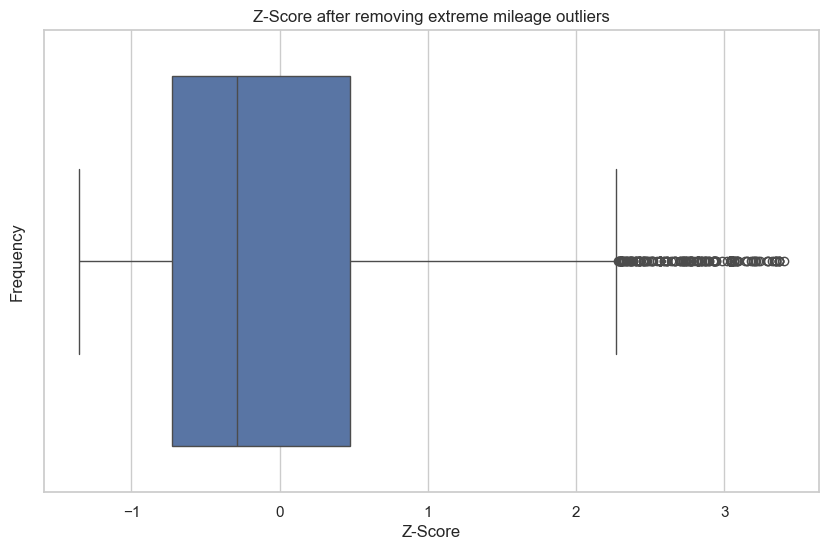

In [14]:
showZScoreBoxPlot(df_without_age_kms_outliers, "kms_driven", "Z-Score after removing extreme mileage outliers")

## 3) Price Distribution

In [15]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_without_age_kms_outliers["price"].describe()

count     32523.00
mean      68364.13
std       90847.92
min        4400.00
25%       25000.00
50%       43000.00
75%       80000.00
max     1900000.00
Name: price, dtype: float64

Mean: 68364.13058450942
Standard Deviation: 90847.91703608143
1st Percentile: 10000.0
99th Percentile: 450000.0


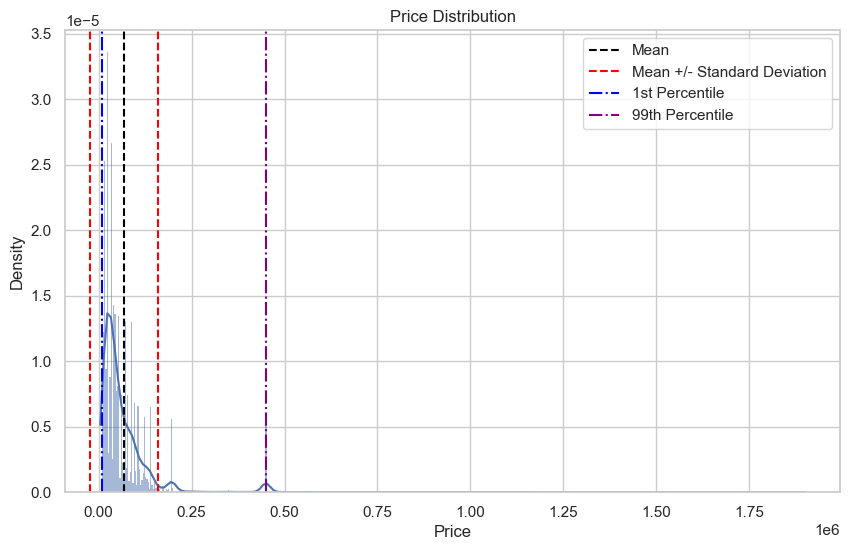

In [16]:
showDistribution(df_without_age_kms_outliers, "price", title="Price Distribution")

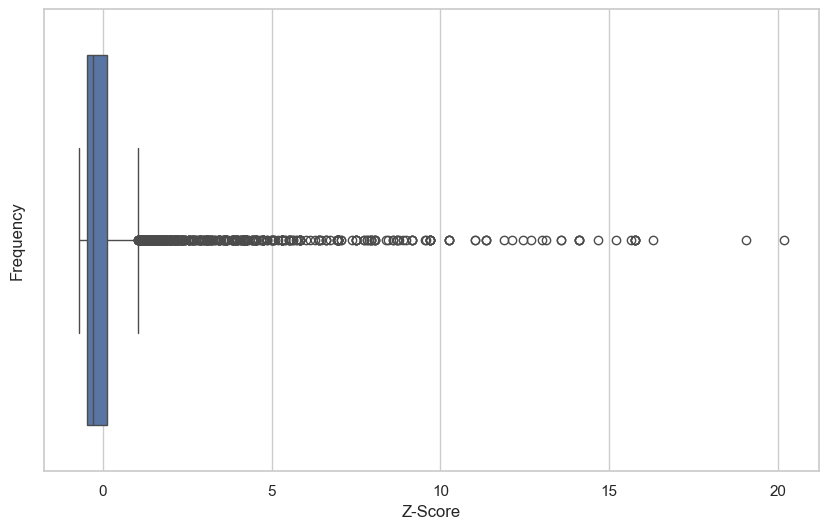

In [17]:
showZScoreBoxPlot(df_without_age_kms_outliers, "price")

## 4) Ownership Column

In [18]:
df_without_age_kms_outliers["owner"].value_counts()

owner
First Owner             29870
Second Owner             2547
Third Owner                97
Fourth Owner Or More        9
Name: count, dtype: int64

We will convert `owner` into a numerical column using Ordinal Encoding 🔢

Since ownership count has a natural order, we can map it like this:

In [19]:
owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth Owner Or More': 4
}
useful_df = df_without_age_kms_outliers.copy()
useful_df['owner_encoded'] = useful_df['owner'].map(owner_mapping)
useful_df.head()

,model,price,city,kms_driven,owner,age,power,brand,owner_encoded
0,TVS Star City Plus Dual Tone 110cc,35000,Ahmedabad,17654,First Owner,3,110,TVS,1
1,Royal Enfield Classic 350cc,119900,Delhi,11000,First Owner,4,350,Royal Enfield,1
2,Triumph Daytona 675R,600000,Delhi,110,First Owner,8,675,Triumph,1
3,TVS Apache RTR 180cc,65000,Bangalore,16329,First Owner,4,180,TVS,1
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,Bangalore,10000,First Owner,3,150,Yamaha,1


## 5) Brand Distribution

In [20]:
brands = useful_df.groupby("brand").size().sort_values()
brands

brand
LML                    1
Indian                 3
MV                     4
Jawa                  10
BMW                   16
Ducati                22
Triumph               26
Mahindra              55
Benelli               56
Hyosung               64
Kawasaki              79
Harley-Davidson      737
KTM                 1076
TVS                 1236
Suzuki              1464
Honda               2095
Yamaha              3904
Royal Enfield       4141
Hero                6350
Bajaj              11184
dtype: int64

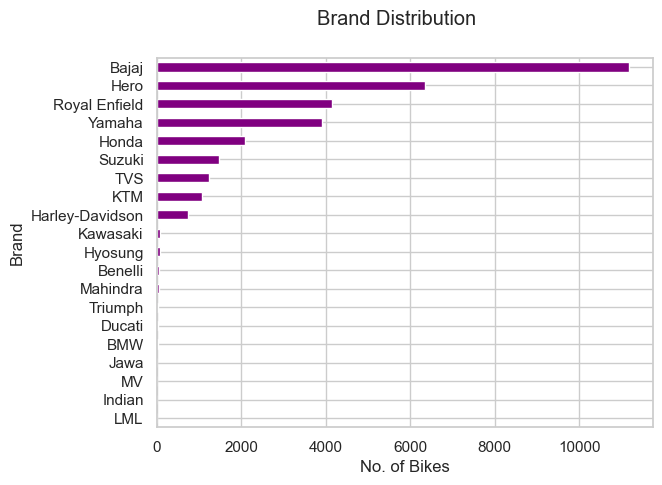

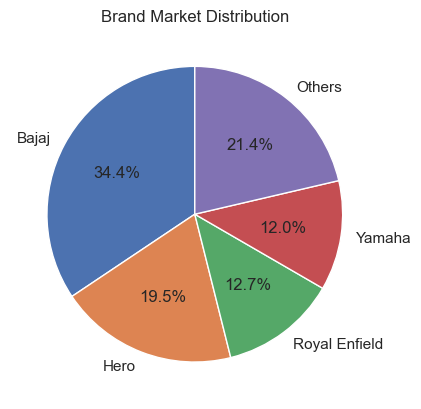

In [21]:
brands.plot(
    kind="barh",
    xlabel="No. of Bikes",
    ylabel="Brand",
    title="Brand Distribution",
    color="purple",
    subplots=True,
)
plt.show()

# Pie chart for company-wise sales
number_of_companies = 4
company_wise_sales_pie = useful_df.groupby("brand").size().sort_values(ascending=False).head(number_of_companies).copy()
company_wise_sales_pie.loc['Others'] = useful_df.groupby("brand").size().sort_values(ascending=False).tail(-number_of_companies).sum()
company_wise_sales_pie.plot(kind='pie', autopct='%1.1f%%', startangle=90, title="Brand Market Distribution")
plt.show()


### 📊 Bike Brand Distribution in the Resale Market

##### **Bajaj, Hero, and Royal Enfield** together hold around **66%** of the used bike market

- **Bajaj (34.4%) ~ 11k and Hero (19.5%) ~ 6k** dominate the resale market, indicating high supply and affordability.  
- **Royal Enfield (12.7%) ~ 4k and Yamaha (12.0%) ~ 4k** show strong resale value and customer loyalty.  
- **Others (21.4%)** include brands like Honda, TVS, KTM, and Harley-Davidson with notable niche and premium offerings.

The data shows that **mass-market brands** lead the used bike space, while **premium and enthusiast brands** form a smaller but significant segment. 🏍️📈

## 6) Relation between Price and Mileage

In [22]:
def plot_scatter_chart(df, x_col, y_col, title = ""):
    x = df[x_col]
    y = df[y_col]
    plt.figure(figsize=(11, 7))
    plt.scatter(x,y,s=6, marker=".", label="")
    plt.title(title)
    plt.gca().ticklabel_format(axis='y', style='plain', useOffset=True, useLocale=True)
    plt.xlabel(x_col.capitalize())
    plt.ylabel(y_col.capitalize())
    plt.show()

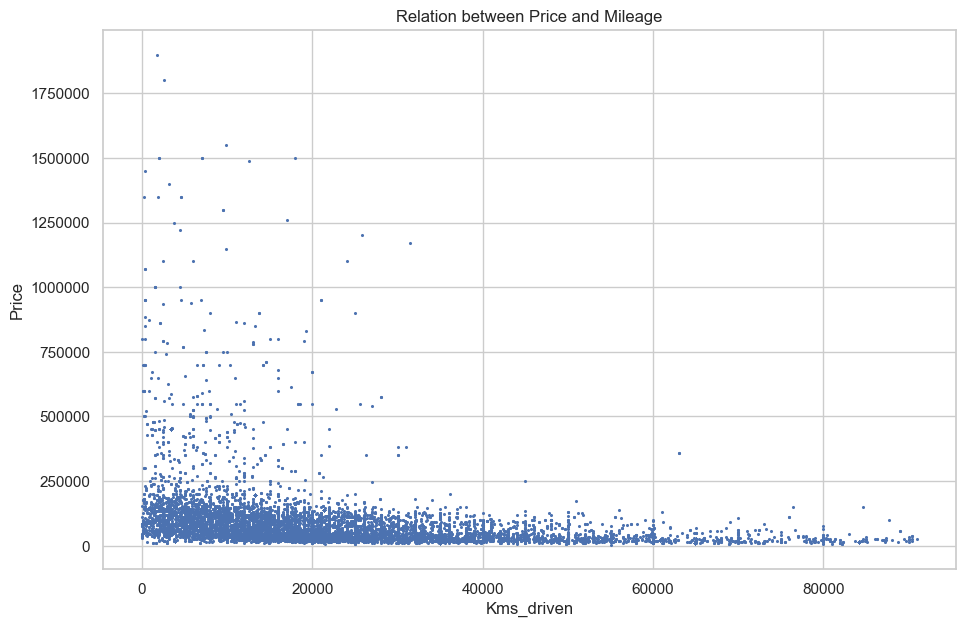

In [23]:
plot_scatter_chart(useful_df, "kms_driven", "price", "Relation between Price and Mileage")

### 📉 Relation between Price and Mileage

##### **Price drops as mileage increases**, indicating depreciation with usage

- Bikes with **lower mileage** generally have **higher resale value**.
- A **dense cluster** is visible under ₹2,00,000 for bikes driven under 40,000 kms.
- Outliers with **very high prices and low mileage** may indicate premium or luxury models.
- The overall trend suggests a **negative correlation** between price and mileage.

This shows that buyers tend to value **less-used bikes** more, and price drops significantly with increased usage. 🛣️💰

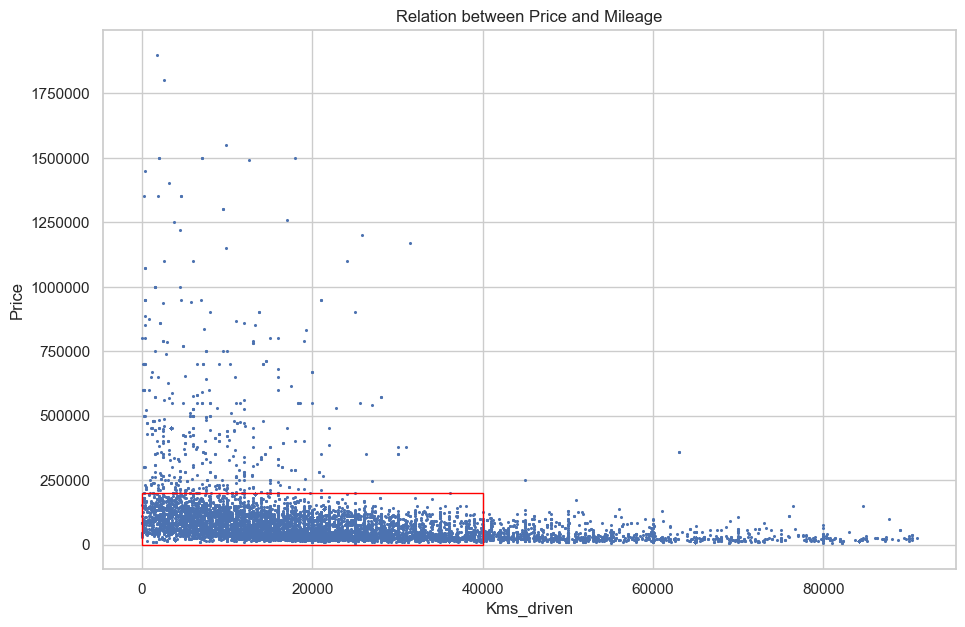

In [24]:

# Load the data
x_col="kms_driven"
y_col="price"
x = useful_df[x_col]
y = useful_df[y_col]
plt.figure(figsize=(11, 7))
plt.scatter(x,y,s=6, marker=".", label="")
plt.title("Relation between Price and Mileage")
plt.gca().ticklabel_format(axis='y', style='plain', useOffset=True, useLocale=True)


from matplotlib.patches import Rectangle

# Create a rectangle at point (x, y) with specified width and height
rect = Rectangle((0, 0), 40000, 200000, edgecolor='red', facecolor='none', lw=1)

# Add the rectangle to the Axes
ax = plt.gca()
ax.add_patch(rect)


plt.xlabel(x_col.capitalize())
plt.ylabel(y_col.capitalize())
plt.show()


## 7) Relation between Price and Age

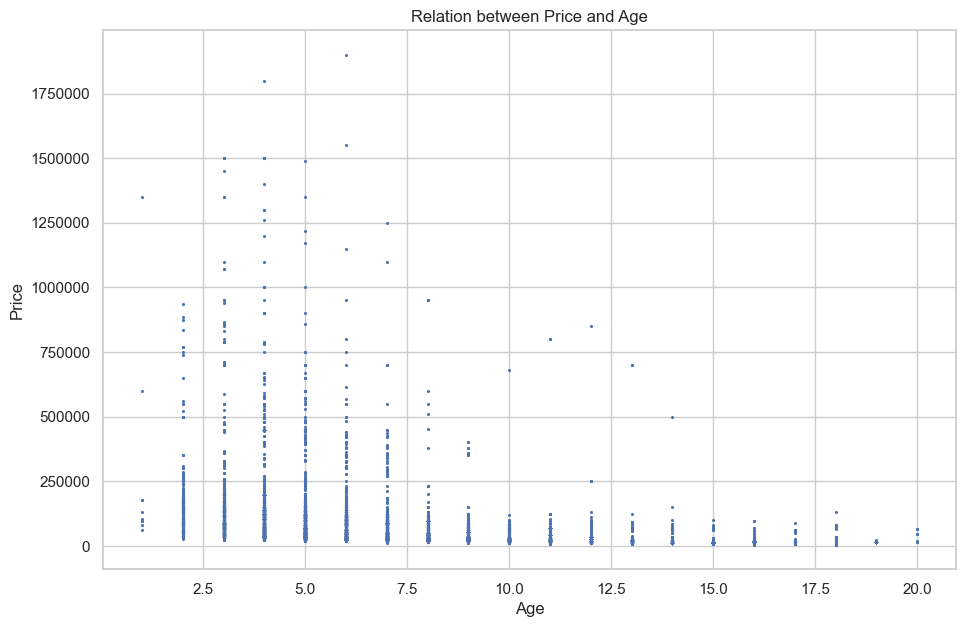

In [25]:
plot_scatter_chart(useful_df, "age", "price", "Relation between Price and Age")

### 📉 Price vs. Age of Bikes

##### **Older bikes tend to have lower prices**, reflecting depreciation over time

- Most bikes **under 5 years old** command **higher resale prices**.
- Beyond **10 years**, prices significantly decline, forming a **low-value cluster**.
- A few **young, high-priced outliers** suggest the presence of **premium or performance models**.
- The trend shows a **clear negative correlation** between age and resale price.

This highlights that **newer bikes hold better market value**, while older models face rapid depreciation. 🕒💸

## 8) Power (Engine CC) Column

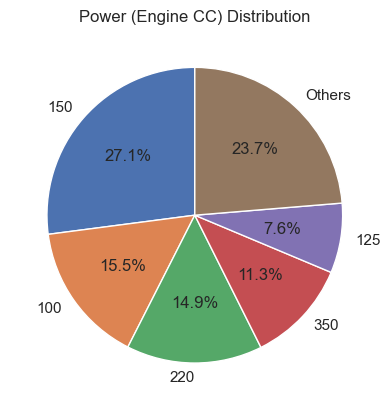

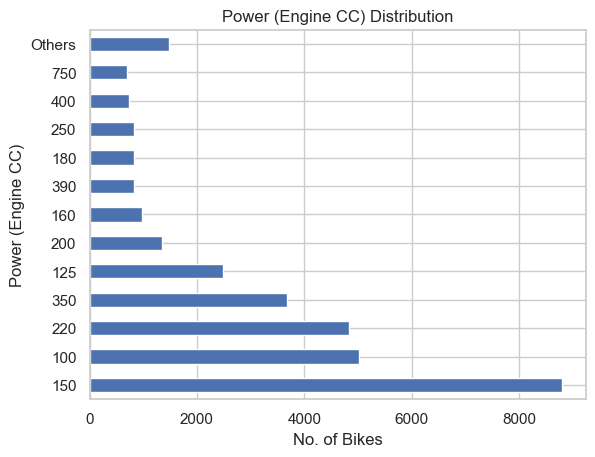

In [26]:
number_of_pies = 5
company_wise_sales_pie = useful_df.groupby("power").size().sort_values(ascending=False).head(number_of_pies).copy()
company_wise_sales_pie.loc['Others'] = useful_df.groupby("power").size().sort_values(ascending=False).tail(-number_of_pies).sum()
company_wise_sales_pie.plot(kind='pie', autopct='%1.1f%%', startangle=90, title="Power (Engine CC) Distribution")
plt.show()

number_of_pies = 12
company_wise_sales_pie = useful_df.groupby("power").size().sort_values(ascending=False).head(number_of_pies).copy()
company_wise_sales_pie.loc['Others'] = useful_df.groupby("power").size().sort_values(ascending=False).tail(-number_of_pies).sum()
company_wise_sales_pie.plot(kind='barh', title="Power (Engine CC) Distribution", ylabel="Power (Engine CC)", xlabel="No. of Bikes")
plt.show()

In [27]:
# plot_scatter_chart(useful_df, "power", "price", "Relation between Price and Power")

# Saving the useful Dataframe

Storing the cleaned data into a CSV file

In [28]:
useful_df.to_csv("Cleaned_Bike_Data.csv", index=False)
useful_df

,model,price,city,kms_driven,owner,age,power,brand,owner_encoded
0,TVS Star City Plus Dual Tone 110cc,35000,Ahmedabad,17654,First Owner,3,110,TVS,1
1,Royal Enfield Classic 350cc,119900,Delhi,11000,First Owner,4,350,Royal Enfield,1
2,Triumph Daytona 675R,600000,Delhi,110,First Owner,8,675,Triumph,1
3,TVS Apache RTR 180cc,65000,Bangalore,16329,First Owner,4,180,TVS,1
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,Bangalore,10000,First Owner,3,150,Yamaha,1
...,...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000,Delhi,22000,First Owner,4,100,Hero,1
32644,TVS Apache RTR 180cc,30000,Karnal,6639,First Owner,9,180,TVS,1
32645,Bajaj Avenger Street 220,60000,Delhi,20373,First Owner,6,220,Bajaj,1
32646,Hero Super Splendor 125cc,15600,Jaipur,84186,First Owner,16,125,Hero,1
